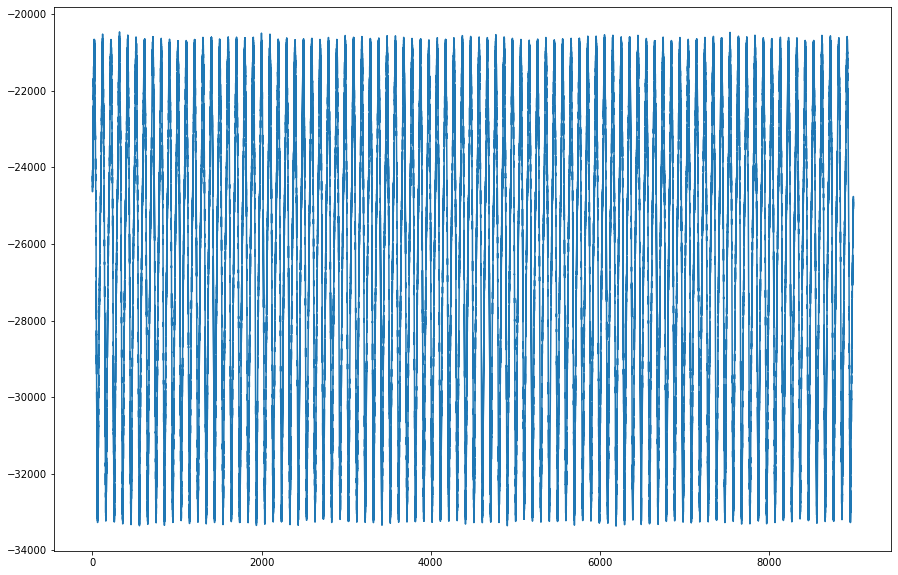

In [14]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

from scipy import signal
from sinefit import sinfit


data = np.genfromtxt('Data_Sets/magdata.csv', delimiter=',')

time = data[:,0]
x_data = data[:,1]
y_data = data[:,2]
z_data = data[:,3]
b_mag = np.sqrt((x_data)**2 + (y_data)**2 + (z_data)**2)

x_peaks = scipy.signal.find_peaks(x_data, None, None, distance = 2000)

plt.rcParams["figure.figsize"]=15,10
plt.plot(time, x_data)


In [25]:
1/0.010107853828715048


98.93297003950879

{'amp': 5309.849942995896, 'omega': 0.06350951866370132, 'phase': 0.5678812996421956, 'offset': -26307.713495565775, 'freq': 0.010107853828715048, 'period': 98.93297003950879, 'fitfunc': <function sinfit.<locals>.<lambda> at 0x7fdf6f3e6f70>, 'maxcov': 8.163519545001323, 'rawres': (array([ 5.51400515e+03,  6.35287142e-02,  0.00000000e+00, -2.63084977e+04]), array([ 5.30984994e+03,  6.35095187e-02,  5.67881300e-01, -2.63077135e+04]), array([[ 8.16351955e+00,  1.02310070e-09, -4.20848629e-06,
         1.16718900e-03],
       [ 1.02310070e-09,  4.29282954e-14, -1.93449465e-10,
        -1.64111932e-09],
       [-4.20848629e-06, -1.93449465e-10,  1.16140610e-06,
         7.83523417e-06],
       [ 1.16718900e-03, -1.64111932e-09,  7.83523417e-06,
         4.08256762e+00]]))}


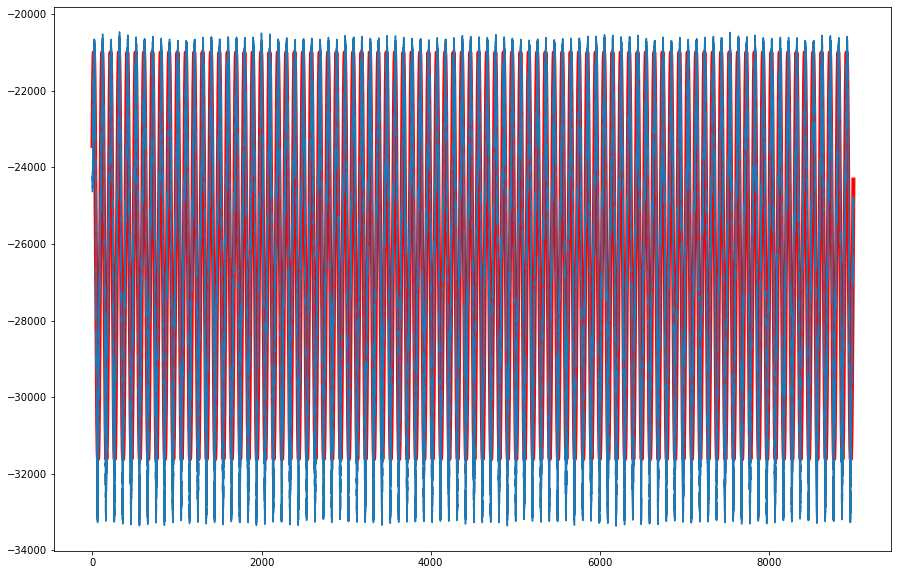

In [15]:
res = sinfit(time, x_data)
plt.plot(time, res["fitfunc"](time), "r-", label="y fit curve", linewidth=4)
plt.plot(time, x_data)
print(res)

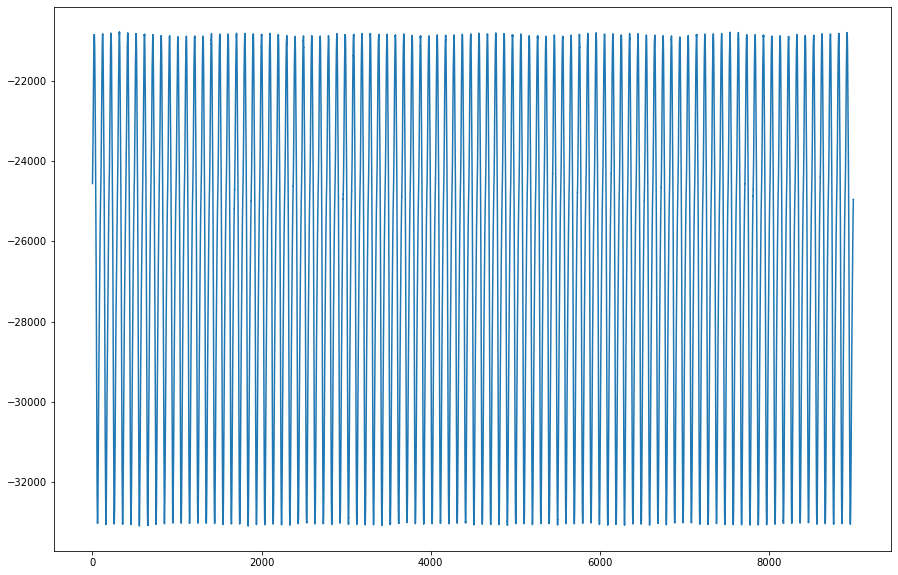

In [17]:
smooth = scipy.signal.savgol_filter(x_data, 99, 3)
plt.plot(time, smooth)


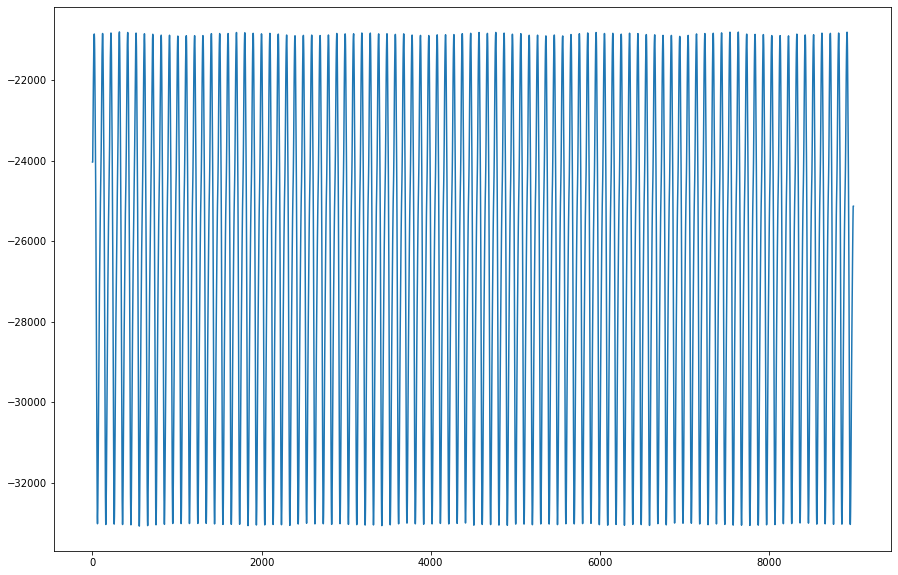

In [18]:
def smoothTriangle(data, degree):
    triangle=np.array(list(range(degree)) + [degree] + list(range(degree)[::-1])) + 1
    smoothed=[]

    for i in range(degree, len(data) - degree * 2):
        point=data[i:i + len(triangle)] * triangle
        smoothed.append(sum(point)/sum(triangle))
    smoothed=[smoothed[0]]*int(degree + degree/2) + smoothed
    while len(smoothed) < len(data):
        smoothed.append(smoothed[-1])
    return smoothed

smooth = smoothTriangle(x_data, 50)
plt.plot(time, smooth)

In [19]:
def peakfinder(data):
    peaks = []
    for i in range(len(time)-1):
        if data[i]>data[i+1] and data[i]>data[i-1]:
            peaks.append(data[i])
    return peaks

print(peakfinder(smooth))


[-20852.644752018456, -33011.88773548635, -20840.866589773163, -20841.24644367551, -20840.913879277203, -20827.462129950018, -20800.622837370243, -20815.483660130718, -20830.347558631296, -20830.32218377547, -20846.589004229143, -20859.8123798539, -20882.685890042292, -20882.20953479431, -20882.222606689735, -33028.12187620146, -33028.15417147251, -33027.09996155325, -20883.883890811227, -33007.22529796232, -20904.44828911957, -20895.70588235294, -20895.635140330643, -33008.81084198385, -20894.068050749713, -20892.832756632066, -20892.834294502114, -20892.841983852366, -20895.583237216455, -20900.10957324106, -20902.057670126873, -20843.93348712034, -20842.87812379854, -20841.331410995772, -20841.289504036908, -20842.60976547482, -20843.012687427912, -20815.644752018456, -20820.40369088812, -20820.402921953097, -20835.458285274894, -20848.483275663206, -20836.592848904267, -20854.97385620915, -33037.234909650135, -20878.740484429065, -20894.375240292196, -20894.364090734332, -20891.971

In [20]:
smooth = np.array(smooth)
ind_max = scipy.signal.argrelmax(smooth)
ind_min = scipy.signal.argrelmin(smooth)
print(ind_max)

(array([   626,   1768,   3568,   3572,   3581,   6557,   9538,  12492,
        15453,  15458,  18436,  21396,  24360,  24368,  24371,  25515,
        25517,  25524,  27332,  28482,  30281,  33281,  33284,  34406,
        36234,  39176,  39178,  39180,  39192,  39219,  39234,  42187,
        45126,  45137,  48089,  48102,  48110,  51088,  54047,  54049,
        57004,  59963,  62938,  65925,  67059,  68894,  71857,  71859,
        74808,  74829,  77785,  80745,  80748,  80765,  83707,  83725,
        83731,  86691,  87833,  89649,  92654,  92656,  95580,  98581,
        98583, 101505, 101519, 101524, 101547, 104489, 104495, 107458,
       108617, 110430, 110436, 113400, 113402, 113405, 114543, 114551,
       116379, 119341, 120487, 122317, 125283, 128223, 128233, 128236,
       128240, 128249, 128253, 128260, 129387, 131213, 132356, 132358,
       134198, 137140, 137154, 138289, 140119, 143095, 143105, 146059,
       148997, 151985, 151990, 154953, 157929, 160864, 160880, 160884,
     

[]
[]


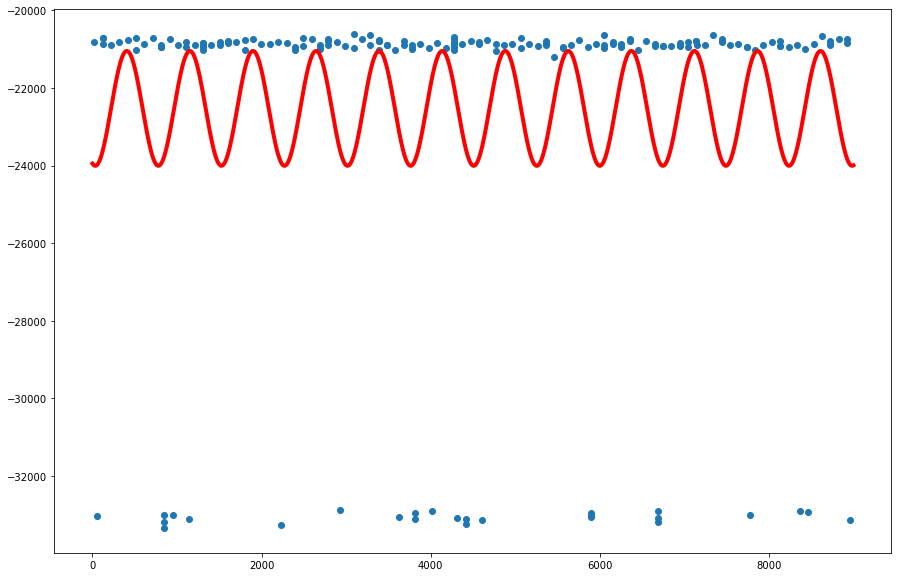

In [24]:
mxtime = []
mntime = []
mxdata = []
mndata = []
time2 = []
data2 = []

for i in ind_max: 
    mxtime = time[i]
    mxdata = x_data[i]
for i in ind_min: 
    mntime = time[i]
    mndata = x_data[i]

#time2 = np.append(mxtime,mntime)
#data2 = np.append(mxdata, mndata)
#plt.plot(time, x_data)
#plt.plot(time, smooth)
bfit = sinfit(mxtime, mxdata)
plt.plot(time, bfit["fitfunc"](time), "r-", label="y fit curve", linewidth=4)
plt.scatter(mxtime, mxdata)

print(time2)
print(data2)

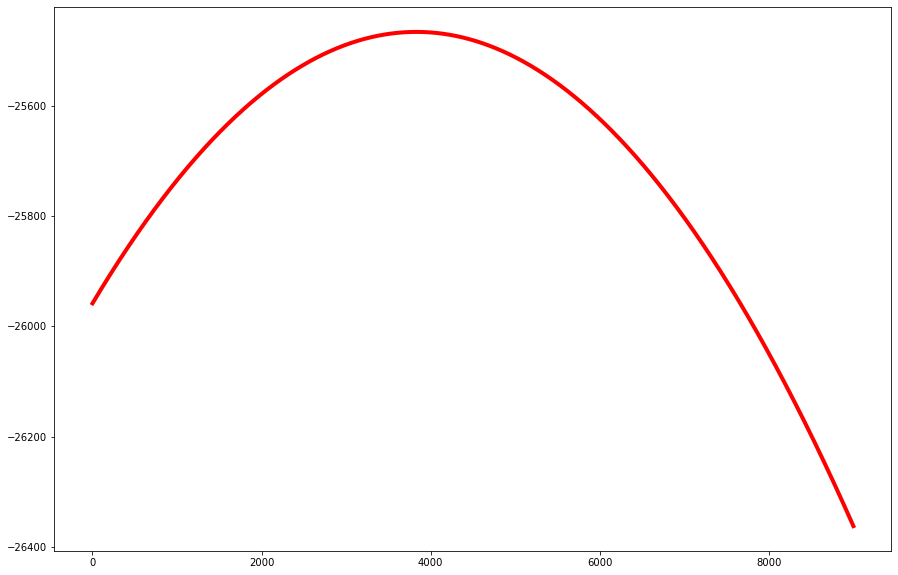

In [22]:
bfit = sinfit(time2, data2)
plt.plot(time, bfit["fitfunc"](time), "r-", label="y fit curve", linewidth=4)